In [1]:
import overpass
import osm2geojson
import geopandas
import matplotlib.pyplot as plt

## Obtener las calles de Iñas con la API de Overpass

Buscamos las calles/carreteras de titularidad municipal. Usamos la etiqueta de osm "highway" = "residential"

In [2]:
api = overpass.API()
result = api.get("""
area[name = "Iñás"];
way["highway" = "residential"](area);
(._;>;);""", responseformat="xml")
geojson = osm2geojson.xml2geojson(result)

## Procesar el resultado de Overpass

Obtenemos un xml y generamos un geojson. El API de Overpass nos devuelve todas las etiquetas de OSM en una celda, formateada como un JSON. Extraemos la que nos interesa, *smoothness* (Estado del pavimento) para ponerla aislada en una celda.

In [3]:
streetsDataFrame = geopandas.GeoDataFrame.from_features(geojson)
streetsDataFrame.crs = "EPSG:4326"
array = [None] * streetsDataFrame.index.stop
for i in streetsDataFrame.index:
    if "smoothness" in streetsDataFrame['tags'][i]:
        array[i] = streetsDataFrame['tags'][i]['smoothness']
streetsDataFrame['smoothness'] = array
streetsDataFrame=streetsDataFrame.to_crs(epsg=3857)

## Creamos la visualización del mapa

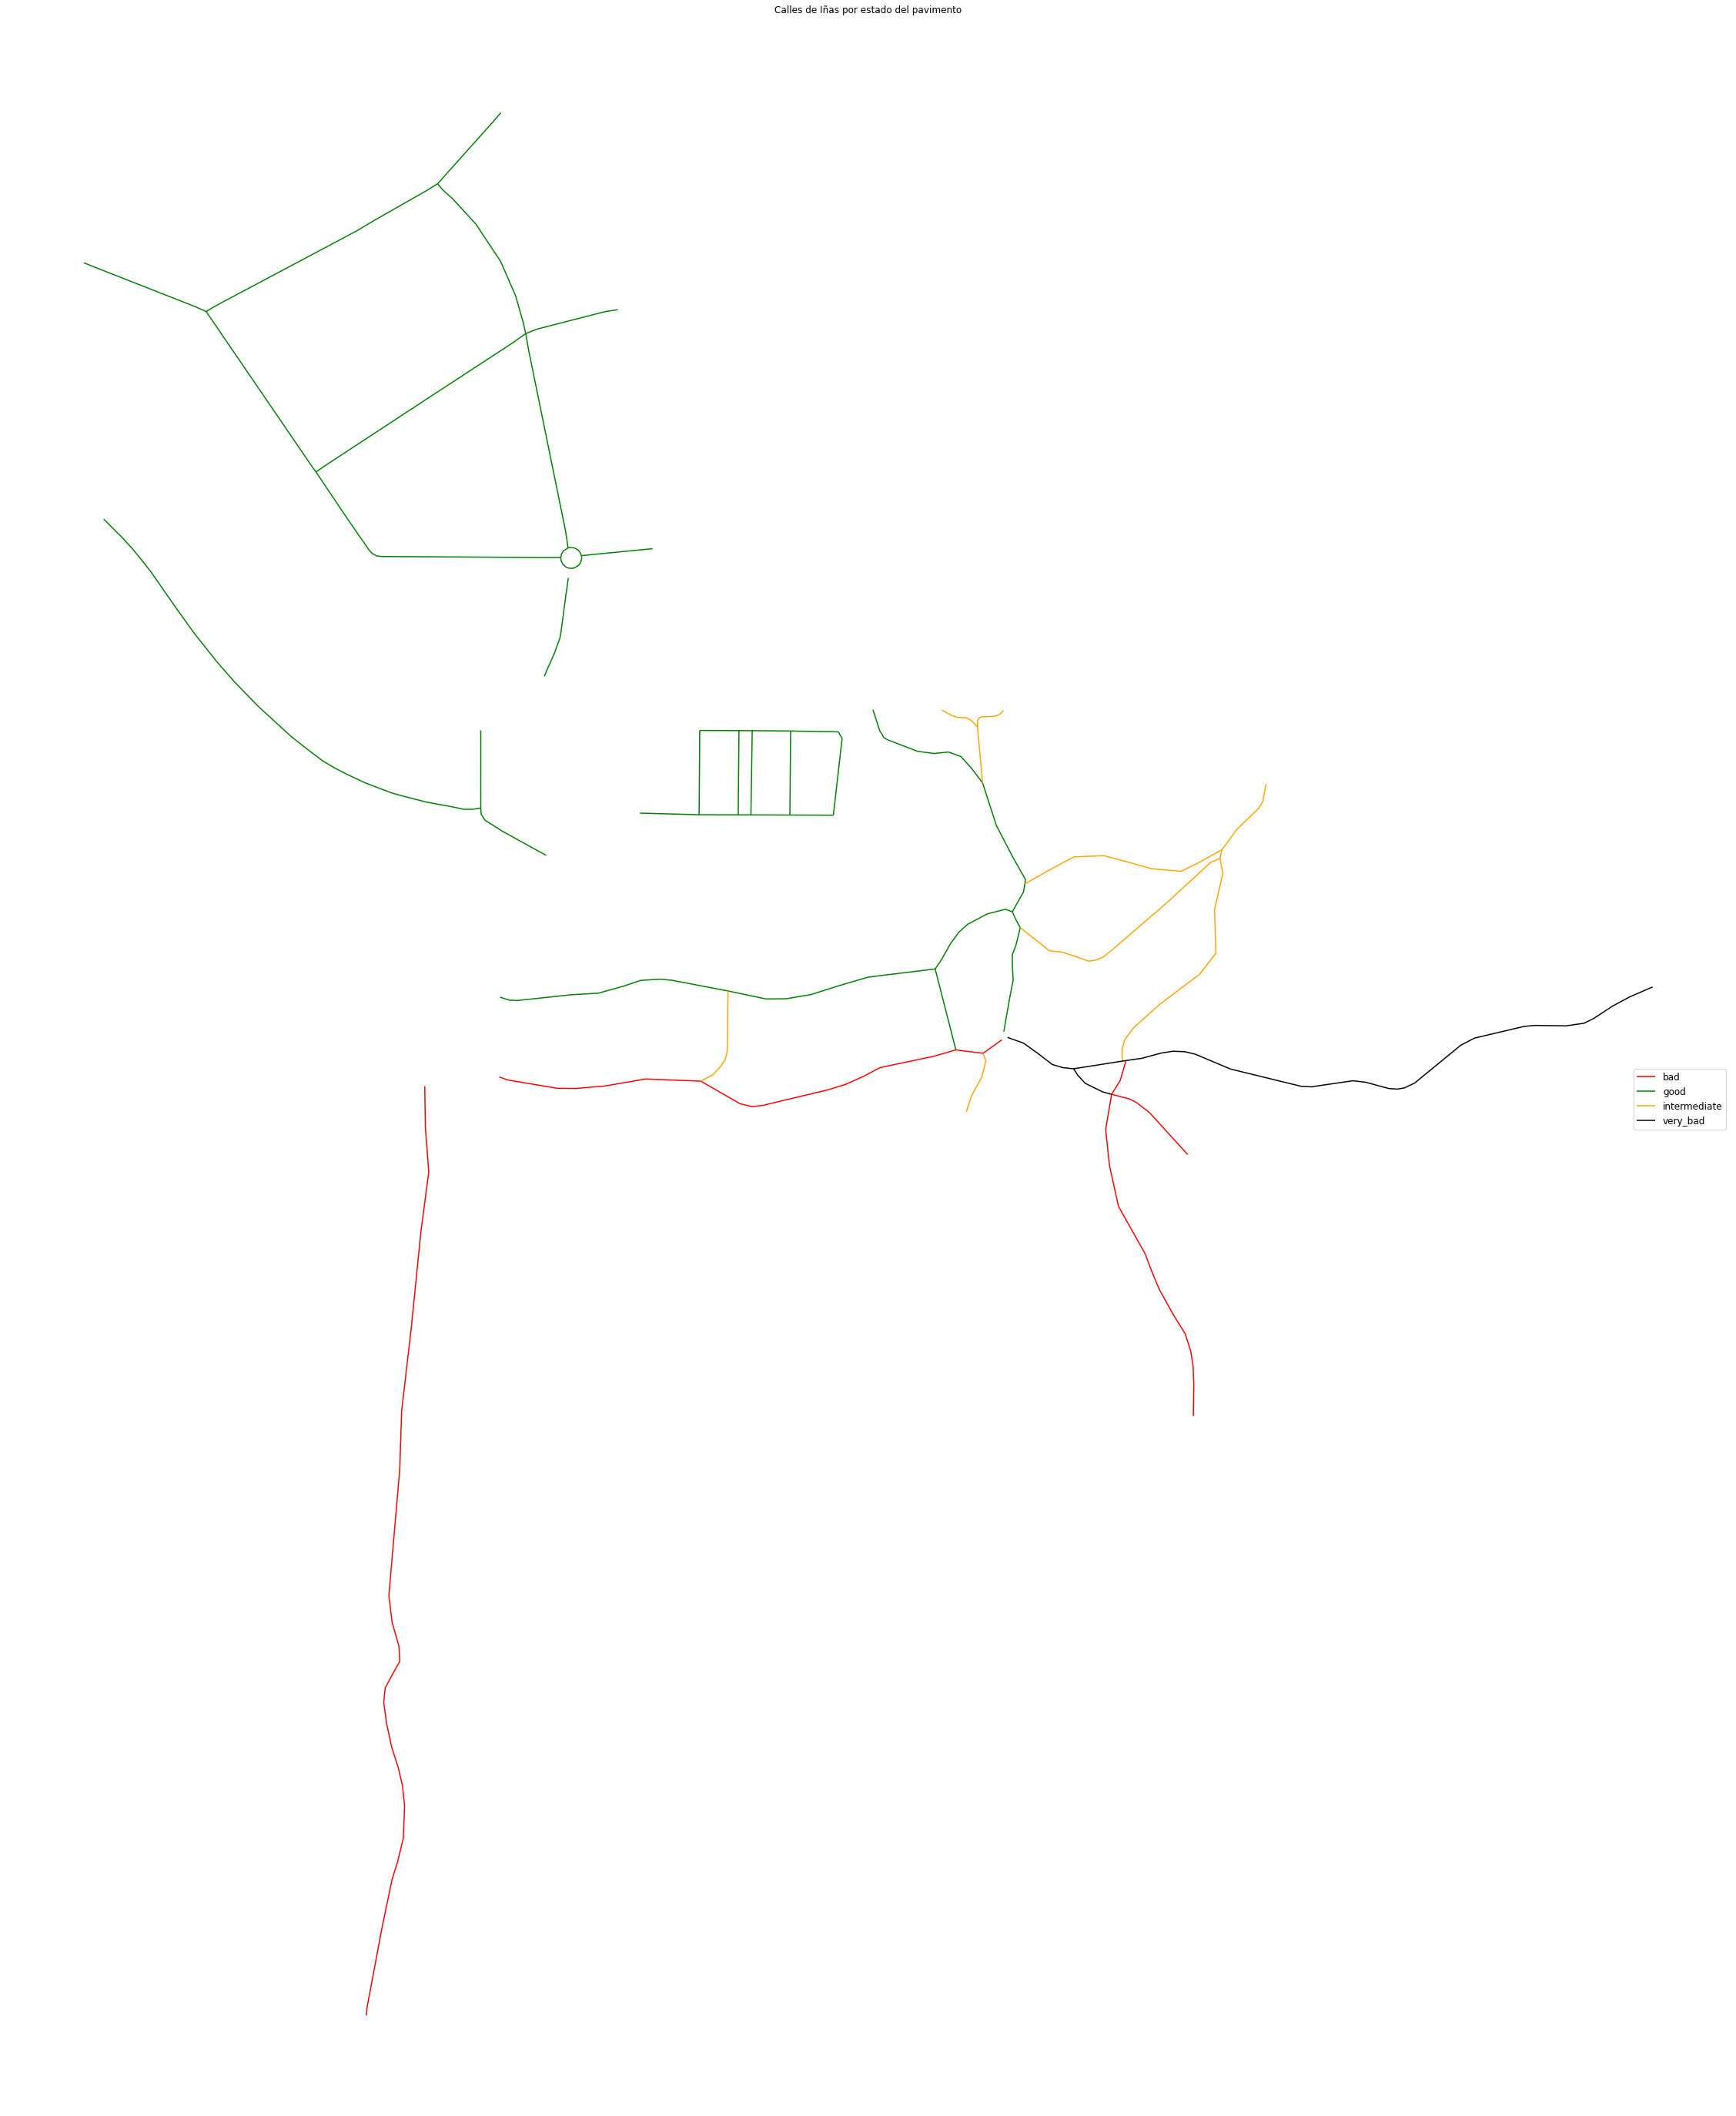

In [4]:
fig, ax = plt.subplots(figsize=(50, 50))
colors = {'good': 'green', 'bad': 'red', 'intermediate': 'orange', 'very_bad': 'black'}
for state, data in streetsDataFrame.groupby('smoothness'):
    color = colors[state]
    data.plot(color=color,
              ax=ax,
              label=state)
ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
ax.set(title="Calles de Iñas por estado del pavimento")
ax.set_axis_off()

df_wm = streetsDataFrame.to_crs(epsg=3857)
plt.show()